# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

# Importing Dataset

In [2]:
adds = pd.read_csv(r'C:\Users\rinuj\Social_Network_Ads.csv')
adds.head(9)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0


In [3]:
adds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
adds.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
adds.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Feature Selection

In [6]:
corr = adds.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

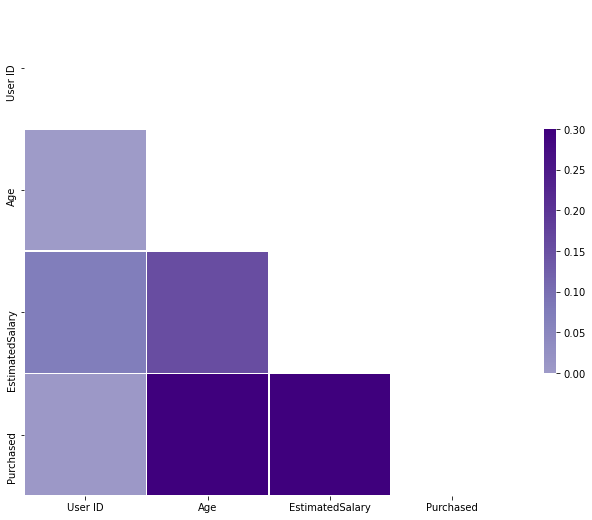

In [7]:
figure, ax = plt.subplots(figsize = (11,9))
sb.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
User ID            0.007120
Name: Purchased, dtype: float64


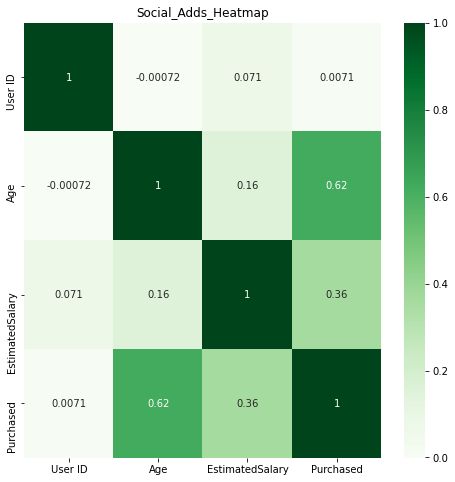

In [8]:
corr_matrix = adds.corr()
addscorr = corr_matrix['Purchased'].sort_values(ascending = False)
print(addscorr)
figure, ax = plt.subplots(figsize = (8, 8))
#print(figure, ax)
plt.title("Social_Adds_Heatmap")
sb.heatmap(corr_matrix, annot = True, cmap='Greens')

In [9]:
x = adds.iloc[:, [2,3]].values
y = adds.iloc[:, -1].values
print(x.shape, y.shape)

(400, 2) (400,)


# Splitting Dataset into Training and Testing

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

# Feature Scaling

In [11]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# 1- Logistic Regression

In [12]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [13]:
print(classifier.predict(sc.transform([[45,90000]])))

[1]


# Predicting train and test results

In [14]:
y_pred_train = classifier.predict(x_train)
y_pred = classifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


# Confusion Matrix, Accuracy, Classification Report - Training Set

In [15]:
cm_tr = confusion_matrix(y_train, y_pred_train)
score_tr = accuracy_score(y_train, y_pred_train)
cr_tr = classification_report(y_train,y_pred_train)
print("Confusion Matrix")
print(cm_tr)
print("Accuracy Score: ", score_tr)
print("Classification report")
print(cr_tr)

Confusion Matrix
[[186  17]
 [ 32  85]]
Accuracy Score:  0.846875
Classification report
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       203
           1       0.83      0.73      0.78       117

    accuracy                           0.85       320
   macro avg       0.84      0.82      0.83       320
weighted avg       0.85      0.85      0.84       320



# Confusion Matrix - Visualization - Train Result

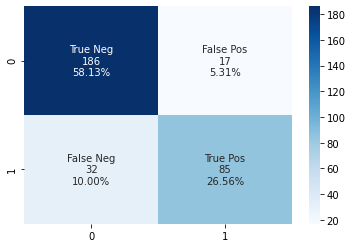

In [16]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_tr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm_tr.flatten()/np.sum(cm_tr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cm_tr, annot=labels, fmt='', cmap='Blues')

# Confusion Matrix, Accuracy, Classification Report - Test Set

In [17]:
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("Accuracy Score: ", score)
print("Classification report")
print(cr)

Confusion Matrix
[[50  4]
 [ 5 21]]
Accuracy Score:  0.8875
Classification report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        54
           1       0.84      0.81      0.82        26

    accuracy                           0.89        80
   macro avg       0.87      0.87      0.87        80
weighted avg       0.89      0.89      0.89        80



# Confusion Matrix - Visualization - Test Result

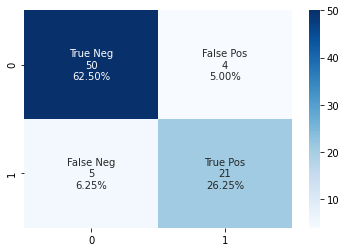

In [18]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# K-Fold cross validation- Logistic Regression - Training Set

In [19]:
Log_accuracy_tr = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(Log_accuracy_tr.mean(),Log_accuracy_tr.std()))

Mean Accuracy: 0.83, Std of Accuracy: 0.05


# K-Fold cross validation- Logistic Regression - Test Set

In [20]:
Log_accuracy = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(Log_accuracy.mean(),Log_accuracy.std()))

Mean Accuracy: 0.85, Std of Accuracy: 0.12


# 2- K-Nearest Neighbours

In [21]:
knnclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnclassifier.fit(x_train, y_train)

KNeighborsClassifier()

# predictingTrain and Test results

In [22]:
y_pred_train = knnclassifier.predict(x_train)
y_pred = knnclassifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


# Confusion Matrix, Accuracy, Classification Report- Training Set

In [23]:
kc_matrix_tr = confusion_matrix(y_train, y_pred_train)
k_score_tr = accuracy_score(y_train, y_pred_train)
k_cr_tr = classification_report(y_train,y_pred_train)
print("Confusion Matrix")
print(kc_matrix_tr)
print("Accuracy Score: ", k_score_tr)
print("Classification report")
print(k_cr_tr)

Confusion Matrix
[[185  18]
 [  7 110]]
Accuracy Score:  0.921875
Classification report
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       203
           1       0.86      0.94      0.90       117

    accuracy                           0.92       320
   macro avg       0.91      0.93      0.92       320
weighted avg       0.93      0.92      0.92       320



# Confusion Matrix - Visualization - Train Result

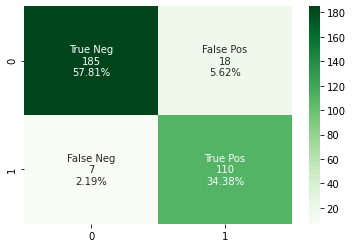

In [24]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in kc_matrix_tr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in kc_matrix_tr.flatten()/np.sum(kc_matrix_tr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(kc_matrix_tr, annot=labels, fmt='', cmap='Greens')

# Confusion Matrix, Accuracy, Classification Report - Test Set

In [25]:
kc_matrix = confusion_matrix(y_test, y_pred)
k_score = accuracy_score(y_test, y_pred)
k_cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(kc_matrix)
print("Accuracy Score: ", k_score)
print("Classification report")
print(k_cr)

Confusion Matrix
[[50  4]
 [ 3 23]]
Accuracy Score:  0.9125
Classification report
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        54
           1       0.85      0.88      0.87        26

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



# Confusion Matrix - Visualization - Test Result

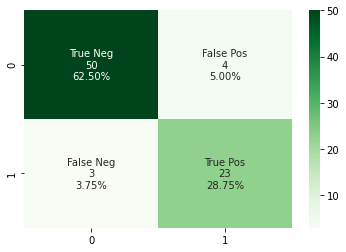

In [26]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in kc_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in kc_matrix.flatten()/np.sum(kc_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(kc_matrix, annot=labels, fmt='', cmap='Greens')

# K-Fold cross validation- K-NN- Train Set

In [27]:
Knn_accuracy_tr = cross_val_score(estimator = knnclassifier, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(Knn_accuracy_tr.mean(),Knn_accuracy_tr.std()))

Mean Accuracy: 0.91, Std of Accuracy: 0.06


# K-Fold cross validation- K-NN- Test Set

In [28]:
Knn_accuracy = cross_val_score(estimator = knnclassifier, X = x_test, y = y_test, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(Knn_accuracy.mean(),Knn_accuracy.std()))

Mean Accuracy: 0.85, Std of Accuracy: 0.11


# 3- Support Vector Machine(SVM)

In [29]:
svmclassifier = SVC(kernel = 'linear', random_state = 0)
svmclassifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

# Predicting train and test results

In [30]:
y_pred_train = svmclassifier.predict(x_train)
y_pred = svmclassifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


# Confusion Matrix, Accuracy, Classification Report - Training Set

In [31]:
svm_matrix_tr = confusion_matrix(y_train, y_pred_train)
svm_score_tr = accuracy_score(y_train, y_pred_train)
svm_cr_tr = classification_report(y_train,y_pred_train)
print("Confusion Matrix")
print(svm_matrix_tr)
print("Accuracy Score: ", svm_score_tr)
print("Classification report")
print(svm_cr_tr)

Confusion Matrix
[[184  19]
 [ 31  86]]
Accuracy Score:  0.84375
Classification report
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       203
           1       0.82      0.74      0.77       117

    accuracy                           0.84       320
   macro avg       0.84      0.82      0.83       320
weighted avg       0.84      0.84      0.84       320



# Confusion Matrix - Visualization - Train Result

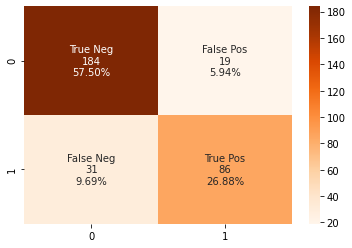

In [32]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in svm_matrix_tr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in svm_matrix_tr.flatten()/np.sum(svm_matrix_tr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(svm_matrix_tr, annot=labels, fmt='', cmap='Oranges')

# Confusion Matrix, Accuracy, Classification Report - Test Set

In [33]:
svm_matrix = confusion_matrix(y_test, y_pred)
svm_score = accuracy_score(y_test, y_pred)
svm_cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(svm_matrix)
print("Accuracy Score: ", svm_score)
print("Classification report")
print(svm_cr)

Confusion Matrix
[[50  4]
 [ 5 21]]
Accuracy Score:  0.8875
Classification report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        54
           1       0.84      0.81      0.82        26

    accuracy                           0.89        80
   macro avg       0.87      0.87      0.87        80
weighted avg       0.89      0.89      0.89        80



# Confusion Matrix Visualization - Test set

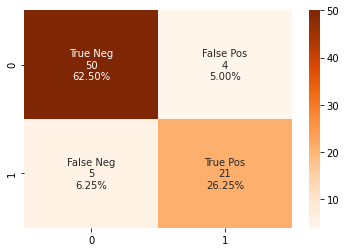

In [34]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in svm_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in svm_matrix.flatten()/np.sum(svm_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(svm_matrix, annot=labels, fmt='', cmap='Oranges')

# K-Fold cross validation- SVM - Training Set

In [35]:
svm_accuracy_tr = cross_val_score(estimator = svmclassifier, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(svm_accuracy_tr.mean(),svm_accuracy_tr.std()))

Mean Accuracy: 0.83, Std of Accuracy: 0.05


# K-Fold cross validation- SVM - Test Set

In [36]:
svm_accuracy = cross_val_score(estimator = svmclassifier, X = x_test, y = y_test, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(svm_accuracy.mean(),svm_accuracy.std()))

Mean Accuracy: 0.85, Std of Accuracy: 0.12


# 4 - Kernal SVM

In [37]:
ksvmclassifier = SVC(kernel = 'rbf', random_state = 0)
ksvmclassifier.fit(x_train, y_train)

SVC(random_state=0)

# Predicting train and test results

In [38]:
y_pred_train = ksvmclassifier.predict(x_train)
y_pred = ksvmclassifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


# Confusion Matrix, Accuracy, Classification Report - Training Set

In [39]:
ksvm_matrix_tr = confusion_matrix(y_train, y_pred_train)
ksvm_score_tr = accuracy_score(y_train, y_pred_train)
ksvm_cr_tr = classification_report(y_train,y_pred_train)
print("Confusion Matrix")
print(ksvm_matrix_tr)
print("Accuracy Score: ", ksvm_score_tr)
print("Classification report")
print(ksvm_cr_tr)

Confusion Matrix
[[185  18]
 [  9 108]]
Accuracy Score:  0.915625
Classification report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       203
           1       0.86      0.92      0.89       117

    accuracy                           0.92       320
   macro avg       0.91      0.92      0.91       320
weighted avg       0.92      0.92      0.92       320



# Confusion Matrix - Visualization - Train Result

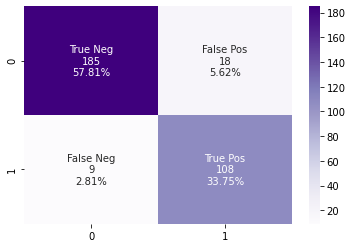

In [40]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in ksvm_matrix_tr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in ksvm_matrix_tr.flatten()/np.sum(ksvm_matrix_tr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(ksvm_matrix_tr, annot=labels, fmt='', cmap= 'Purples')

# Confusion Matrix, Accuracy, Classification Report - Test Set

In [41]:
ksvm_matrix = confusion_matrix(y_test, y_pred)
ksvm_score = accuracy_score(y_test, y_pred)
ksvm_cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(ksvm_matrix)
print("Accuracy Score: ", ksvm_score)
print("Classification report")
print(ksvm_cr)

Confusion Matrix
[[48  6]
 [ 2 24]]
Accuracy Score:  0.9
Classification report
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        54
           1       0.80      0.92      0.86        26

    accuracy                           0.90        80
   macro avg       0.88      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80



# Confusion Matrix - Visualization - Test Result

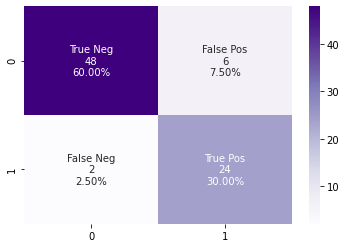

In [42]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in ksvm_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in ksvm_matrix.flatten()/np.sum(ksvm_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(ksvm_matrix, annot=labels, fmt='', cmap= 'Purples')

# K-Fold cross validation- Kernal SVM - Training Set

In [43]:
ksvm_accuracy_tr = cross_val_score(estimator = ksvmclassifier, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(ksvm_accuracy_tr.mean(),ksvm_accuracy_tr.std()))

Mean Accuracy: 0.91, Std of Accuracy: 0.07


# K-Fold cross validation- Kernal SVM - Test Set

In [44]:
ksvm_accuracy = cross_val_score(estimator = ksvmclassifier, X = x_test, y = y_test, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(ksvm_accuracy.mean(),ksvm_accuracy.std()))

Mean Accuracy: 0.86, Std of Accuracy: 0.09


# 5- Naive Bayes

In [45]:
nbclassifier = GaussianNB()
nbclassifier.fit(x_train, y_train)

GaussianNB()

# Predicting train and test results

In [46]:
y_pred_train = nbclassifier.predict(x_train)
y_pred = nbclassifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


# Confusion Matrix, Accuracy, Classification Report - Training Set

In [47]:
nb_matrix_tr = confusion_matrix(y_train, y_pred_train)
nb_score_tr = accuracy_score(y_train, y_pred_train)
nb_cr_tr = classification_report(y_train,y_pred_train)
print("Confusion Matrix")
print(nb_matrix_tr)
print("Accuracy Score: ", nb_score_tr)
print("Classification report")
print(nb_cr_tr)

Confusion Matrix
[[189  14]
 [ 20  97]]
Accuracy Score:  0.89375
Classification report
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       203
           1       0.87      0.83      0.85       117

    accuracy                           0.89       320
   macro avg       0.89      0.88      0.88       320
weighted avg       0.89      0.89      0.89       320



# Confusion Matrix - Visualization - Train Result

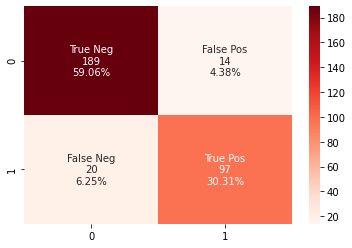

In [48]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in nb_matrix_tr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in nb_matrix_tr.flatten()/np.sum(nb_matrix_tr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(nb_matrix_tr, annot=labels, fmt='', cmap='Reds')

# Confusion Matrix, Accuracy, Classification Report - Test Set

In [49]:
nb_matrix = confusion_matrix(y_test, y_pred)
nb_score = accuracy_score(y_test, y_pred)
nb_cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(nb_matrix)
print("Accuracy Score: ", nb_score)
print("Classification report")
print(nb_cr)

Confusion Matrix
[[49  5]
 [ 3 23]]
Accuracy Score:  0.9
Classification report
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        54
           1       0.82      0.88      0.85        26

    accuracy                           0.90        80
   macro avg       0.88      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



# Confusion Matrix - Visualization - Test Result

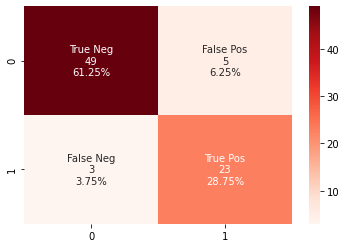

In [50]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in nb_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in nb_matrix.flatten()/np.sum(nb_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(nb_matrix, annot=labels, fmt='', cmap='Reds')

# K-Fold cross validation- Naive Bayes - Training Set

In [51]:
nb_accuracy_tr = cross_val_score(estimator = nbclassifier, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(nb_accuracy_tr.mean(),nb_accuracy_tr.std()))

Mean Accuracy: 0.89, Std of Accuracy: 0.05


# K-Fold cross validation- Naive Bayes - Test Set

In [52]:
nb_accuracy = cross_val_score(estimator = nbclassifier, X = x_test, y = y_test, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(nb_accuracy.mean(),nb_accuracy.std()))

Mean Accuracy: 0.90, Std of Accuracy: 0.07


# 6- Decision Tree Classification

In [53]:
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtclassifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predicting train and test results

In [54]:
y_pred_train = dtclassifier.predict(x_train)
y_pred = dtclassifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


# Confusion Matrix, Accuracy, Classification Report - Training Set

In [55]:
dt_matrix_tr = confusion_matrix(y_train, y_pred_train)
dt_score_tr = accuracy_score(y_train, y_pred_train)
dt_cr_tr = classification_report(y_train,y_pred_train)
print("Confusion Matrix")
print(dt_matrix_tr)
print("Accuracy Score: ", dt_score_tr)
print("Classification report")
print(dt_cr_tr)

Confusion Matrix
[[203   0]
 [  1 116]]
Accuracy Score:  0.996875
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      0.99      1.00       117

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



# Confusion Matrix - Visualization - Train Result

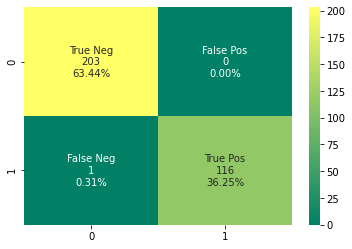

In [56]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in dt_matrix_tr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in dt_matrix_tr.flatten()/np.sum(dt_matrix_tr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(dt_matrix_tr, annot=labels, fmt='', cmap='summer')

# Confusion Matrix, Accuracy, Classification Report - Test Set

In [57]:
dt_matrix = confusion_matrix(y_test, y_pred)
dt_score = accuracy_score(y_test, y_pred)
dt_cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(dt_matrix)
print("Accuracy Score: ", dt_score)
print("Classification report")
print(dt_cr)

Confusion Matrix
[[48  6]
 [ 7 19]]
Accuracy Score:  0.8375
Classification report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        54
           1       0.76      0.73      0.75        26

    accuracy                           0.84        80
   macro avg       0.82      0.81      0.81        80
weighted avg       0.84      0.84      0.84        80



# Confusion Matrix - Visualization - Test Result

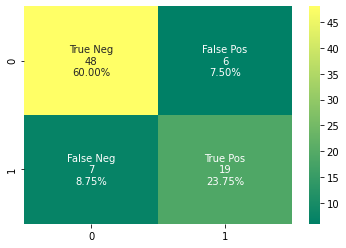

In [58]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in dt_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in dt_matrix.flatten()/np.sum(dt_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(dt_matrix, annot=labels, fmt='', cmap='summer')

# K-Fold cross validation- DecisionTree - Training Set

In [59]:
dt_accuracy_tr = cross_val_score(estimator = dtclassifier, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(dt_accuracy_tr.mean(),dt_accuracy_tr.std()))

Mean Accuracy: 0.87, Std of Accuracy: 0.08


# K-Fold cross validation- Decision Tree - Test Set

In [60]:
dt_accuracy = cross_val_score(estimator = dtclassifier, X = x_test, y = y_test, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(dt_accuracy.mean(),dt_accuracy.std()))

Mean Accuracy: 0.85, Std of Accuracy: 0.09


# 7 -  Random Forest Classification

In [61]:
rfclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfclassifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Predicting train and test results

In [62]:
y_pred_train = rfclassifier.predict(x_train)
y_pred = rfclassifier.predict(x_test)
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


# Confusion Matrix, Accuracy, Classification Report - Training Set

In [63]:
rfc_matrix_tr = confusion_matrix(y_train, y_pred_train)
rfc_score_tr = accuracy_score(y_train, y_pred_train)
rfc_cr_tr = classification_report(y_train,y_pred_train)
print("Confusion Matrix")
print(rfc_matrix_tr)
print("Accuracy Score: ", rfc_score_tr)
print("Classification report")
print(rfc_cr_tr)

Confusion Matrix
[[202   1]
 [  2 115]]
Accuracy Score:  0.990625
Classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       203
           1       0.99      0.98      0.99       117

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



# Confusion Matrix - Visualization - Train Result

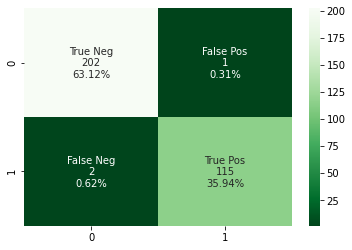

In [64]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in rfc_matrix_tr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in rfc_matrix_tr.flatten()/np.sum(rfc_matrix_tr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(rfc_matrix_tr, annot=labels, fmt='', cmap='Greens_r')

# Confusion Matrix, Accuracy, Classification Report - Test Set

In [65]:
rfc_matrix = confusion_matrix(y_test, y_pred)
rfc_score = accuracy_score(y_test, y_pred)
rfc_cr = classification_report(y_test,y_pred)
print("Confusion Matrix")
print(rfc_matrix)
print("Accuracy Score: ", rfc_score)
print("Classification report")
print(rfc_cr)

Confusion Matrix
[[49  5]
 [ 5 21]]
Accuracy Score:  0.875
Classification report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.81      0.81      0.81        26

    accuracy                           0.88        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.88      0.88      0.88        80



# Confusion Matrix - Visualization - Test Result

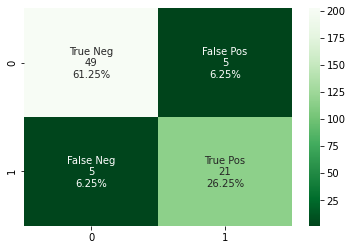

In [66]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in rfc_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in rfc_matrix.flatten()/np.sum(rfc_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(rfc_matrix_tr, annot=labels, fmt='', cmap='Greens_r')

# K-Fold cross validation- Random Forest - Training Set

In [67]:
rf_accuracy_tr = cross_val_score(estimator = rfclassifier, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(rf_accuracy_tr.mean(),rf_accuracy_tr.std()))

Mean Accuracy: 0.88, Std of Accuracy: 0.07


# K-Fold cross validation- Random Forest - Test Set

In [68]:
rf_accuracy = cross_val_score(estimator = rfclassifier, X = x_test, y = y_test, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(rf_accuracy.mean(),rf_accuracy.std()))

Mean Accuracy: 0.85, Std of Accuracy: 0.09
